### Towards a better understanding of Word Embeddings
To get a better understanding of what's actually happening with word embeddings, let's start with something small.

In [1]:
plants = [
    {'name': 'basil', 'size': 5, 'difficulty': 10},
    {'name': 'aloe vera', 'size': 10, 'difficulty': 15},
    {'name': 'lavender', 'size': 20, 'difficulty': 30},
    {'name': 'monstera', 'size': 50, 'difficulty': 35},
    {'name': 'sunflower', 'size': 40, 'difficulty': 25},
    {'name': 'snake plant', 'size': 25, 'difficulty': 10},
    {'name': 'orchid', 'size': 15, 'difficulty': 70},
    {'name': 'oak tree', 'size': 90, 'difficulty': 50},
    {'name': 'maple tree', 'size': 85, 'difficulty': 55},
    {'name': 'cactus (saguaro)', 'size': 80, 'difficulty': 40},
    {'name': 'venus flytrap', 'size': 4, 'difficulty': 85},
    {'name': 'hydrangea', 'size': 30, 'difficulty': 35},
    {'name': 'banana plant', 'size': 60, 'difficulty': 45},
    {'name': 'bonsai tree', 'size': 10, 'difficulty': 95}
]

We can observe it in a clearer way using the DataFrame data type from the library `pandas`. Let's install it first.

In [2]:
!pip install pandas

In [3]:
import pandas as pd
pd.DataFrame(plants, columns=['name', 'size', 'difficulty'])

,name,size,difficulty
0,basil,5,10
1,aloe vera,10,15
2,lavender,20,30
3,monstera,50,35
4,sunflower,40,25
5,snake plant,25,10
6,orchid,15,70
7,oak tree,90,50
8,maple tree,85,55
9,cactus (saguaro),80,40


Here we see a list of plants, each gets a score between 0-100 for their size and difficulty to take care of. These scores are not based on any scientific studies and are very subjective based on my personal experience. To get a good visual representation of this small dataset, we can use the library `matplotlib`.

In [4]:
!pip install matplotlib

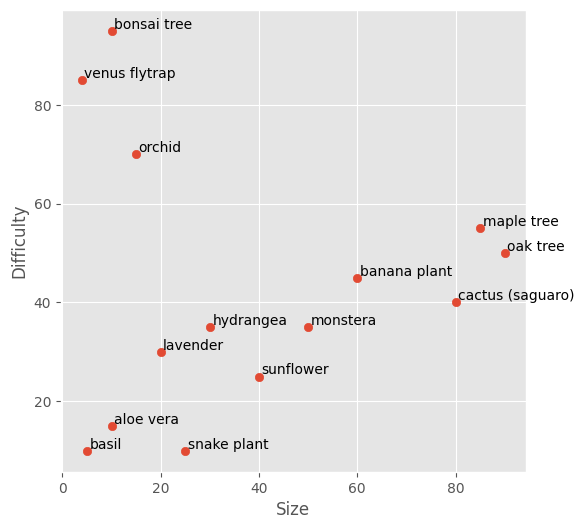

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # specify the plotting style

# Turning the list of plants into a dictionary that maps between the name of the plant and their size/difficulty values as a tuple.
plants2d = {plant['name']: (plant['size'], plant['difficulty']) for plant in plants}

# plot plants_2d
plt.figure(figsize=(6, 6))
# creating a plot based on x - size, y - difficulty
plt.scatter([item[0] for item in plants2d.values()],
            [item[1] for item in plants2d.values()])
plt.xlabel('Size')
plt.ylabel('Difficulty')
for key, (size, difficulty) in plants2d.items():
    plt.text(size+0.5, difficulty+0.5, key)
plt.show()

In this 2-dimensional vector space for our list of plants, we can observe that basil and aloe vera are more similar than basil and maple tree. This similarity can be represented mathematically by calculating the Euclidean distance between two points.

In [6]:
import math
def distance2d(x, y):
    # The math.dist() method returns the Euclidean distance between two points
    return math.dist(x, y)

print(f"Distance between basil {plants2d['basil']} and aloe vera {plants2d['aloe vera']}",  distance2d(plants2d["basil"], plants2d["aloe vera"]))
print(f"Distance between basil {plants2d['basil']} and maple tree {plants2d['maple tree']}", distance2d(plants2d["basil"], plants2d["maple tree"]))

Distance between basil (5, 10) and aloe vera (10, 15) 7.0710678118654755
Distance between basil (5, 10) and maple tree (85, 55) 91.7877987534291


If we take lavender as our reference point in this space, we can sort the whole list of plants based on how similar they are to lavender (considering only size & difficulty). You can change the ref plant in the code cell below to any other plant in the list that you want to check.

In [7]:
ref = "lavender"
sorted(plants,
       key=lambda x: distance2d(plants2d[ref], plants2d[x['name']]))

[{'name': 'lavender', 'size': 20, 'difficulty': 30},
 {'name': 'hydrangea', 'size': 30, 'difficulty': 35},
 {'name': 'aloe vera', 'size': 10, 'difficulty': 15},
 {'name': 'sunflower', 'size': 40, 'difficulty': 25},
 {'name': 'snake plant', 'size': 25, 'difficulty': 10},
 {'name': 'basil', 'size': 5, 'difficulty': 10},
 {'name': 'monstera', 'size': 50, 'difficulty': 35},
 {'name': 'orchid', 'size': 15, 'difficulty': 70},
 {'name': 'banana plant', 'size': 60, 'difficulty': 45},
 {'name': 'venus flytrap', 'size': 4, 'difficulty': 85},
 {'name': 'cactus (saguaro)', 'size': 80, 'difficulty': 40},
 {'name': 'bonsai tree', 'size': 10, 'difficulty': 95},
 {'name': 'maple tree', 'size': 85, 'difficulty': 55},
 {'name': 'oak tree', 'size': 90, 'difficulty': 50}]

Here we have a <b>lamda</b> function. It is an anonymous (unnamed) function. This lambda takes one argument, x, and returns one value (the distance). It is the same as writing the following:

In [8]:
def anonymous_function(x):
    return distance2d(plants2d[ref], plants2d[x['name']])

Another example is to sort the plant by size

In [9]:
sorted(plants, key=lambda x: x['size'])

[{'name': 'venus flytrap', 'size': 4, 'difficulty': 85},
 {'name': 'basil', 'size': 5, 'difficulty': 10},
 {'name': 'aloe vera', 'size': 10, 'difficulty': 15},
 {'name': 'bonsai tree', 'size': 10, 'difficulty': 95},
 {'name': 'orchid', 'size': 15, 'difficulty': 70},
 {'name': 'lavender', 'size': 20, 'difficulty': 30},
 {'name': 'snake plant', 'size': 25, 'difficulty': 10},
 {'name': 'hydrangea', 'size': 30, 'difficulty': 35},
 {'name': 'sunflower', 'size': 40, 'difficulty': 25},
 {'name': 'monstera', 'size': 50, 'difficulty': 35},
 {'name': 'banana plant', 'size': 60, 'difficulty': 45},
 {'name': 'cactus (saguaro)', 'size': 80, 'difficulty': 40},
 {'name': 'maple tree', 'size': 85, 'difficulty': 55},
 {'name': 'oak tree', 'size': 90, 'difficulty': 50}]

We can also calculate an ideal average plant that doesn't exist in our list:

In [10]:
avg_size = sum(p['size'] for p in plants) / len(plants)
avg_difficulty = sum(p['difficulty'] for p in plants) / len(plants)

print("Average size:", avg_size)
print("Average difficulty:", avg_difficulty)

Average size: 37.42857142857143
Average difficulty: 42.857142857142854


And sort our list of plants according to how close they are to the ideal average.

In [11]:
sorted(plants,
       key=lambda x: distance2d((avg_size, avg_difficulty), plants2d[x['name']]))

[{'name': 'hydrangea', 'size': 30, 'difficulty': 35},
 {'name': 'monstera', 'size': 50, 'difficulty': 35},
 {'name': 'sunflower', 'size': 40, 'difficulty': 25},
 {'name': 'lavender', 'size': 20, 'difficulty': 30},
 {'name': 'banana plant', 'size': 60, 'difficulty': 45},
 {'name': 'snake plant', 'size': 25, 'difficulty': 10},
 {'name': 'orchid', 'size': 15, 'difficulty': 70},
 {'name': 'aloe vera', 'size': 10, 'difficulty': 15},
 {'name': 'cactus (saguaro)', 'size': 80, 'difficulty': 40},
 {'name': 'basil', 'size': 5, 'difficulty': 10},
 {'name': 'maple tree', 'size': 85, 'difficulty': 55},
 {'name': 'oak tree', 'size': 90, 'difficulty': 50},
 {'name': 'venus flytrap', 'size': 4, 'difficulty': 85},
 {'name': 'bonsai tree', 'size': 10, 'difficulty': 95}]

---
### Word Embeddings
Word Embeddings in the real world are similar to the example above, but with more dimensions representing their meaning captured from the training data. Usually they tend to have very high dimension during the training process, but the final word embeddings are usually reduced to a dimensionality of 300 or lower.

We can play with word embeddings directly in spaCy. spaCy used to use [the gloVe embeddings](https://nlp.stanford.edu/projects/glove/), now it is using its own embeddings, Explosion. Let's first download both `en_core_web_md` and `en_core_web_lg`. As the small model doesn't include word vectors.

In [12]:
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
      --------------------------------------- 0.5/33.5 MB 1.3 MB/s eta 0:00:26
      --------------------------------------- 0.8/33.5 MB 1.5 MB/s eta 0:00:22
     - -------------------------------------- 1.3/33.5 MB 1.7 MB/s eta 0:00:19
     -- ------------------------------------- 2.1/33.5 MB 2.1 MB/s eta 0:00:15
     --- ------------------------------------ 2.9/33.5 MB 2.5 MB/s eta 0:00:13
     ----- ---------------------------------- 4.2/33.5 MB 3.1 MB/s eta 0:00:10
     ------- -------------------------------- 6.0/33.5 MB 3.9 MB/s eta 0:00:08
     -------- ------------------------------- 7.3/33.5 MB 4.2 MB/s eta 0:00:07
     ----------- ---------------------------- 10.0/33.5 MB 5.1 MB/s eta 0:00:05
     --------------- ------------------------ 13.4/33.5 MB 6.1 MB/s eta 0:00:04
     -------------------- ------------------- 16.8/33.5 MB 7.0 M

Then import spacy and load the language models we just downloaded.

In [31]:
import spacy
nlp = spacy.load("en_core_web_md")
nlp_large = spacy.load("en_core_web_lg")

You can check the vector of any word using spacing by checking the `vector` attribute.

In [14]:
nlp.vocab['speak'].vector

array([-6.2774e-01,  3.9978e-01, -4.7624e-01,  1.5001e-01, -3.5657e-01,
       -1.8639e-01, -9.8144e-02, -2.4939e-01, -1.4997e-01,  2.7316e+00,
       -2.1371e-01, -2.8849e-01,  1.4713e-01, -1.6796e-01, -3.7062e-01,
        4.0618e-01,  1.5978e-02,  1.0757e+00, -4.7995e-01, -3.3348e-01,
        1.0255e-01, -1.2375e-01,  2.6667e-01, -5.6767e-01,  1.2458e-01,
        3.2570e-01, -8.2681e-02,  1.1403e-01,  2.9947e-01, -3.5775e-01,
       -6.5165e-01,  3.6489e-01, -5.1581e-01, -3.6734e-01,  2.5070e-01,
        4.5203e-02, -1.2011e-01,  8.2486e-02,  6.3345e-02, -4.1344e-01,
       -3.3446e-01, -6.0630e-01, -1.0259e-01, -3.4859e-01, -1.6446e-01,
       -7.3494e-03, -2.3318e-01,  1.0198e-01, -3.9395e-01, -8.0910e-02,
       -1.9421e-01,  9.5100e-03, -2.7774e-01, -3.7724e-01,  6.4068e-02,
        1.6218e-01, -5.8869e-01, -1.8021e-01, -2.1038e-01,  2.5797e-02,
       -2.2447e-02,  3.8924e-01,  1.1580e-01, -1.8635e-01,  6.1270e-02,
       -1.6675e-01, -1.9614e-01, -7.3784e-02,  2.2808e-01, -8.60



We can check the dimension of any word vector using the `shape` attribute. spaCy's English model uses 300-dimensional word vectors. Most of the word embeddings you can find online have a dimension of 300. This size was found to be a good balance between capturing enough semantic information and keeping model complexity manageable

In [15]:
nlp.vocab['speak'].vector.shape

(300,)

We can use `.similarity` method to check if two words are neighbors inside the vector space. Notice that we can only call it on [Doc](https://spacy.io/api/doc)/[Span](https://spacy.io/api/span)/[Token](https://spacy.io/api/token)/[Lexeme](https://spacy.io/api/lexeme) objects. The default estimate is cosine similarity between two vectors. When we just want to compare words without context, `Lexeme` works faster because a Lexeme has no string context. It has no part-of-speech tag, dependency parse, or lemma.

In the example below, cat and dog are closer in meaning than cat and red, so their word vectors should be nearer to each other.

In [16]:
# different objects in spaCy
doc = nlp("I love cat")
print(type(doc))
token = doc[2]
print(type(token), token.text)
span = doc[1:3]
print(type(span), span.text)
lexeme = nlp.vocab["cat"]
print(type(lexeme))

lexeme2 = nlp.vocab["dog"]
lexeme3 = nlp.vocab["red"]
print(token.similarity(lexeme2))
print(token.similarity(lexeme3))

<class 'spacy.tokens.doc.Doc'>
<class 'spacy.tokens.token.Token'> cat
<class 'spacy.tokens.span.Span'> love cat
<class 'spacy.lexeme.Lexeme'>
0.9999999403953552
0.1678144633769989


Simply comparing the distance between two specific words isn’t very interesting. It’s far more useful if we can discover similar words using this method.Because in the vector space of word embeddings similar words are located near one another, to find similar words is to find nearest neighbors of a given word.

However, we don’t want to compute distances against every word embedding in the model, because there are far too many. The model we are using contains more than 20k vectors but over 68k tokens in total. Many tokens don’t have vectors, and some share the same vector.

In [17]:
nlp.meta['vectors'] # getting meta deta about the vectors contained in the model we are using

{'width': 300,
 'vectors': 20000,
 'keys': 684830,
 'name': 'en_vectors',
 'mode': 'default'}

To make our result more feasible and faster to compute, we will try to filter our word embeddings with the most common 10k English words (no swears) based on google n-gram from [this source](https://github.com/first20hours/google-10000-english?tab=readme-ov-file). Now let's download the file first:

In [18]:
!curl -L -O https://raw.githubusercontent.com/first20hours/google-10000-english/refs/heads/master/google-10000-english-usa-no-swears.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 75071  100 75071    0     0  94048      0 --:--:-- --:--:-- --:--:-- 94428


And compile a list of common english words based on it.

In [19]:
with open("google-10000-english-usa-no-swears.txt") as f:
    text = f.read()
common_words = text.split("\n")
print(len(common_words))

9885


In the following code cell, we are trying to find the 10 nearest neighbor words of 'cat'. Keep in mind that we’re using a relatively small model for this task, so some of the results you see may not fully make sense.

In [20]:
def nearest_neighbors(target, vocab, k=5):
    """
    Find the nearest neighbors of a target word within a vocab
    vocab needs to be a list of strings
    """
    query = nlp(target)[0]  # token
    scores = {}
    for w in vocab:
        token = nlp.vocab[w]
        if w == target: # skip the same word
            continue
        if token.has_vector:
            score = query.similarity(token)
            scores[w] = score
    top = sorted(scores.items(), key=lambda x: -x[1])[:k]
    return top

nearest_neighbors("cat", common_words, 10)

[('dog', 0.9999999403953552),
 ('pet', 0.9999999403953552),
 ('dogs', 0.9999999403953552),
 ('adoption', 0.9999999403953552),
 ('rescue', 0.9999999403953552),
 ('babies', 0.9999999403953552),
 ('puppy', 0.9999999403953552),
 ('shepherd', 0.9999999403953552),
 ('adopted', 0.7044297456741333),
 ('adopt', 0.7044297456741333)]

#### Exercise 1

- Find the similar words of your choice within a text file.
Ex: what words are similar to word X within the vocabulary of a text file.
- Can you observe any weird results from the returned values?

In [21]:
# replace it with another text file
with open("../week5/cocaine.txt") as f:
    text = f.read()
doc = nlp(text)

In [22]:
vocab_from_file = [token.text for token in doc if token.is_alpha]
#print(vocab_from_file)
nearest_neighbors("cocaine", vocab_from_file, 5)

[('Cocaine', 1.0),
 ('COCAINE', 1.0),
 ('mental', 1.0),
 ('abuse', 1.0),
 ('child', 1.0)]

---
#### Finding Analogy

We can do the same semantic calculation as we tried with the web vectors using the following function in spaCy.
Here we are using nlp_large with `en_core_web_lg` model. Because the `md` one is too small for a good performance.


In [23]:
import numpy as np

def analogy(a, b, c, top_n=1):
    """
    Solve analogies of the form: A : B :: C : D
    Returns the best matching word D.
    """
    # Get vector representations
    A = nlp_large.vocab[a].vector
    B = nlp_large.vocab[b].vector
    C = nlp_large.vocab[c].vector

    # Compute target vector
    target = B - A + C

    # Search the entire vocabulary for closest words
    similarities = []
    for w in common_words: # only check common_words
        word = nlp_large.vocab[w] # get lexeme
        if word.has_vector and word.is_alpha and not word.is_stop:
            sim = np.dot(target, word.vector) / (
                np.linalg.norm(target) * np.linalg.norm(word.vector)
            )
            similarities.append((word.text, float(sim)))

    # Sort by similarity (descending)
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top result(s), skipping the original input words
    results = [w for w, s in similarities if w not in {a, b, c}]
    return results[:top_n]

print(analogy("man", "king", "woman", top_n=5))
print(analogy("paris", "france", "berlin"))
print(analogy("man", "king", "woman", top_n=5))

['queen', 'prince', 'kings', 'princess', 'royal']
['germany']
['queen', 'prince', 'kings', 'princess', 'royal']


#### Exercise 2:
Try out the `analogy()` function with different words.


---
#### Sentence Vectors
Based on word vectors, we can also give a mathematical "summary" of a sentence based on each individual vector. By default, spaCy calculates the vector of a sentence/document by averaging  their token vectors.


In [24]:
sent = nlp("Thou shalt not make a machine in the likeness of a human mind")

The vector representation of this sentence can be found at:

In [25]:
sent.vector

array([-6.71602309e-01,  6.28438517e-02, -2.23459810e-01, -3.03378720e-02,
       -1.08590156e-01,  1.48122087e-01,  5.13861589e-02,  1.38586909e-01,
        4.98899817e-03,  1.79953623e+00,  1.45400008e-02, -3.52184623e-02,
       -1.11505389e-01,  4.31931540e-02, -2.67208256e-02,  1.22425994e-02,
       -2.55248904e-01,  1.11793458e+00, -1.88683242e-01,  2.92624626e-02,
       -1.71033606e-01, -5.07826060e-02, -5.82681559e-02, -1.71299011e-01,
       -8.01175311e-02,  9.18967724e-02,  1.09039620e-01, -4.49925661e-02,
       -5.34820482e-02, -1.79997653e-01, -1.78360149e-01,  2.02101707e-01,
       -6.46903887e-02, -7.48230610e-03,  1.47308454e-01,  1.55008629e-01,
       -1.67196006e-01,  4.68793064e-02, -4.79705967e-02,  3.74286845e-02,
        1.30977191e-03,  1.61566921e-02,  1.51924649e-02, -1.06638093e-02,
        1.58160925e-01, -2.11115599e-01, -3.30602303e-02, -1.53343473e-02,
       -2.03108671e-03, -1.89933069e-02, -2.38622174e-01,  1.41826764e-01,
        4.22264561e-02, -

In [26]:
sent2 = nlp("One shall not make a machine in the likeness of a human mind")
sent3 = nlp("The human brain is an incredible pattern-matching machine")

# Comparing two sentences
print(sent, "<->", sent2, sent.similarity(sent2))
print(sent, "<->", sent3, sent.similarity(sent3))

Thou shalt not make a machine in the likeness of a human mind <-> One shall not make a machine in the likeness of a human mind 0.9535106420516968
Thou shalt not make a machine in the likeness of a human mind <-> The human brain is an incredible pattern-matching machine 0.8121070265769958


A whole document can be represented in a similar way, which makes it possible to compare two the similarity between two documents as well.


We can find most similar sentences from a document based on a given input( the input can be a sentence, a phrase or a word)

In [38]:
# replace it with the text file you picked
with open("../week3/pg26740.txt") as f:
    text = f.read()
doc = nlp_large(text)
sentences = list(doc.sents)
print(sentences)

[﻿The Project Gutenberg eBook of The Picture of Dorian Gray
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever., You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org., If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

, Title: The Picture of Dorian Gray

Author: Oscar Wilde

Release date: October 1, 2008 [eBook #26740]
                Most recently updated: March 10, 2010

Language: English

Credits: Produced by David Clarke, Chuck Greif and the Online
        Distributed Proofreading Team at http://www.pgdp.net


*** START OF THE PROJECT GUTENBERG EBOOK, THE PICTURE OF DORIAN GRAY ***




Produced by David Clarke, Chuck Greif and the Online
Distributed Proofreading Team at http://www.pgdp.net






In [34]:
# replace it with the text file you picked
with open("obama-inaug.txt") as f:
    obama_text = f.read()
doc = nlp_large(obama_text)
obama_sentences = list(doc.sents)

In [36]:
# replace it with the text file you picked
with open("trump-inaug.txt") as f:
    trump_text = f.read()
doc = nlp_large(trump_text)
trump_sentences = list(doc.sents)

In [37]:
print(obama_sentences)
print(trump_sentences)

[My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors., I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.

, Forty-four Americans have now taken the presidential oath., The words have been spoken during rising tides of prosperity and the still waters of peace., Yet, every so often the oath is taken amidst gathering clouds and raging storms., At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.

, So it has been., So it must be with this generation of Americans.

, That we are in the midst of crisis is now well understood., Our nation is at war, against a far-reaching network of violence and hatred., Our economy is badly wea

In [39]:
import pandas as pd

quotes_similarity = {
    "similarity": [],
    "obama_sentence": [],
    "trump_sentence": []
}

for o in obama_sentences:
    obama_doc = nlp(o)
    for t in trump_sentences:
        trump_doc = nlp(t)
        similarity = obama_doc.similarity(trump_doc)

        data["similarity"].append(similarity)
        data["obama_sentence"].append(o)
        data["trump_sentence"].append(t)

df = pd.DataFrame(quotes_similarity)

df_sorted = df.sort_values(by="similarity", ascending=False)

df_sorted.head(10)


ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'spacy.tokens.span.Span'>

In [42]:
import pandas as pd

data = {
    "similarity": [],
    "obama_sentence": [],
    "trump_sentence": []
}

for o in obama_sentences:
    for t in trump_sentences:
        similarity = o.similarity(t)
        
        data["similarity"].append(similarity)
        data["obama_sentence"].append(o.text)
        data["trump_sentence"].append(t.text)

df = pd.DataFrame(data)

most_similar_quotes = df.sort_values("similarity", ascending=False)

most_similar_quotes_sorted.head(10)

,similarity,obama_sentence,trump_sentence
6075,0.969715,"We will not apologize for our way of life, nor...",We do not seek to impose our way of life on an...
5042,0.967692,The success of our economy has always depended...,We will seek friendship and goodwill with the ...
8052,0.967373,What is required of us now is a new era of res...,We will seek friendship and goodwill with the ...
8826,0.966216,At a moment when the outcome of our revolution...,We will seek friendship and goodwill with the ...
5559,0.965756,They understood that our power alone cannot pr...,We do not seek to impose our way of life on an...
6505,0.965294,To those leaders around the globe who seek to ...,We do not seek to impose our way of life on an...
6332,0.964361,"We are shaped by every language and culture, d...",We will seek friendship and goodwill with the ...
7278,0.964037,"For as much as government can do and must do, ...",We will seek friendship and goodwill with the ...
1946,0.963795,The time has come to reaffirm our enduring spi...,We will seek friendship and goodwill with the ...
6763,0.963403,And to those nations like ours that enjoy rela...,We do not seek to impose our way of life on an...


In [43]:
import pandas as pd
import random

speaker1 = "Obama"
speaker2 = "Trump"

df_top = df_sorted.head(50).copy()

# a new DataFrame mapping each sentence to a speaker (there should be a better solution to this but idk)
sentences = []

for _, row in df_top.iterrows():
    sentences.append((row["obama_sentence"], speaker1))
    sentences.append((row["trump_sentence"], speaker2))

sentences_unique = list(dict.fromkeys(sentences))

# Simple quiz game
points = 0

print("Welcome to the quote guessing game!")
print("You will be asked 10 questions.\n")

for i in range(10):
    quote, speaker = random.choice(sentences_unique)
    
    print(f"Quote #{i+1}:")
    print(f"\"{quote}\"")
    guess = input(f"Who do you think said this? ({speaker1} or {speaker2}): ").strip()

    if guess.lower() == speaker.lower():
        points += 5
        print(f"You are right! This is {speaker}'s quote. You now have {points} points.\n")
    else:
        points -= 10
        print(f"Wrong! This is actually {speaker}'s quote. You now have {points} points.\n")

print(f"Game over! Your final score is {points} points.")


Welcome to the quote guessing game!
You will be asked 10 questions.

Quote #1:
"At a moment when the outcome of our revolution was most in doubt, the father of our nation ordered these words be read to the people:
"Let it be told to the future world...that in the depth of winter, when nothing but hope and virtue could survive...that the city and the country, alarmed at one common danger, came forth to meet [it]."

America."


Who do you think said this? (Obama or Trump):  Obama


You are right! This is Obama's quote. You now have 5 points.

Quote #2:
"We do not seek to impose our way of life on anyone, but rather to let it shine as an example for everyone to follow.

"


Who do you think said this? (Obama or Trump):  Trump


You are right! This is Trump's quote. You now have 10 points.

Quote #3:
"Every four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition."


Who do you think said this? (Obama or Trump):  Trump


You are right! This is Trump's quote. You now have 15 points.

Quote #4:
"Rather, it has been the risk-takers, the doers, the makers of things - some celebrated but more often men and women obscure in their labor, who have carried us up the long, rugged path towards prosperity and freedom.

"


Who do you think said this? (Obama or Trump):  Obama


You are right! This is Obama's quote. You now have 20 points.

Quote #5:
"We will reinforce old alliances and form new ones – and unite the civilized world against Radical Islamic Terrorism, which we will eradicate completely from the face of the Earth.

"


Who do you think said this? (Obama or Trump):  Obama


Wrong! This is actually Trump's quote. You now have 10 points.

Quote #6:
"You came by the tens of millions to become part of a historic movement the likes of which the world has never seen before.

"


Who do you think said this? (Obama or Trump):  Trump


You are right! This is Trump's quote. You now have 15 points.

Quote #7:
"We honor them not only because they are guardians of our liberty, but because they embody the spirit of service; a willingness to find meaning in something greater than themselves."


Who do you think said this? (Obama or Trump):  Obama


You are right! This is Obama's quote. You now have 20 points.

Quote #8:
"For the world has changed, and we must change with it.

"


Who do you think said this? (Obama or Trump):  Obama


You are right! This is Obama's quote. You now have 25 points.

Quote #9:
"For the world has changed, and we must change with it.

"


Who do you think said this? (Obama or Trump):  Obama


You are right! This is Obama's quote. You now have 30 points.

Quote #10:
"It is time to remember that old wisdom our soldiers will never forget: that whether we are black or brown or white, we all bleed the same red blood of patriots, we all enjoy the same glorious freedoms, and we all salute the same great American Flag.

"


Who do you think said this? (Obama or Trump):  Obama


Wrong! This is actually Trump's quote. You now have 20 points.

Game over! Your final score is 20 points.


In [29]:
def nearest_neighbors_sentence(input, sentences, k=5):
    query = nlp_large(input)
    scores = {}
    for s in sentences:
        if not s.has_vector: # ignore sentences without vectors
            continue;
        score = query.similarity(s)
        scores[s.text.replace("\n"," ")] = score
    top = sorted(scores.items(), key=lambda x: -x[1])[:k]
    return top
    pass

nearest_neighbors_sentence("man with emotion", sentences, 5)



[('Suddenly I found myself face to face with the young man whose personality had so strangely stirred me.',
  0.8295856714248657),
 ('Lord Henry watched him with a subtle sense of pleasure.',
  0.8262706398963928),
 ("He was conscious--and the thought brought a gleam of pleasure into his brown agate eyes--that it was through certain words of his, musical words said with musical utterance, that Dorian Gray's soul had turned to this white girl and bowed in worship before her.",
  0.8211484551429749),
 ('There was something in its expression that filled him with disgust and loathing. ',
  0.8204286694526672),
 ('He seemed broken with shame and sorrow.', 0.8130702972412109)]

#### Exercise 3
Try finding similar sentences with different inputs in your document. What works well and what not so?

In [49]:
import pandas as pd
import random

quotes_similarity = {
    "similarity": [],
    "speaker1_sentence": [],
    "speaker2_sentence": []
}

# read 2 documents, here I changed the names to more general terms so I can also use other documents
with open("obama-inaug.txt") as f:
    speaker1_text = f.read()
doc1 = nlp_large(speaker1_text)
speaker1_sentences = list(doc1.sents)
with open("trump-inaug.txt") as f:
    speaker2_text = f.read()
doc2 = nlp_large(speaker2_text)
speaker2_sentences = list(doc2.sents)

# iterate through every sentence from the first document and compare it with every one from the second
for o in speaker1_sentences:
    for t in speaker2_sentences:
        similarity = o.similarity(t)
        
        quotes_similarity["similarity"].append(similarity)
        quotes_similarity["speaker1_sentence"].append(o.text)
        quotes_similarity["speaker2_sentence"].append(t.text)

# create a pandas dataframe, so i can filter the data easier
df = pd.DataFrame(quotes_similarity)
most_similar_quotes = df.sort_values("similarity", ascending=False)
most_similar_quotes = most_similar_quotes.head(20).copy()

speaker1 = "Obama"
speaker2 = "Trump"

# a new DataFrame mapping each sentence to a speaker (there should be a better solution to this but idk)
sentences = []

for _, row in most_similar_quotes.iterrows():
    sentences.append((row["speaker1_sentence"], speaker1))
    sentences.append((row["speaker2_sentence"], speaker2))

sentences_unique = list(dict.fromkeys(sentences))

# Simple quiz game
points = 0

print("Welcome to the quote guessing game!")
print("You will be asked 10 questions.\n")

for i in range(10):
    quote, speaker = random.choice(sentences_unique)
    
    print(f"Quote #{i+1}:")
    print(f"\"{quote}\"")
    guess = input(f"Who do you think said this? ({speaker1} or {speaker2}): ").strip()

    if guess.lower() == speaker.lower():
        points += 5
        print(f"You are right! This is {speaker}'s quote. You now have {points} points.\n")
    else:
        points -= 10
        print(f"Wrong! This is actually {speaker}'s quote. You now have {points} points.\n")

print(f"Game over! Your final score is {points} points.")


Welcome to the quote guessing game!
You will be asked 10 questions.

Quote #1:
"To those leaders around the globe who seek to sow conflict, or blame their society's ills on the West - know that your people will judge you on what you can build, not what you destroy."


Who do you think said this? (Obama or Trump):  Obama


You are right! This is Obama's quote. You now have 5 points.

Quote #2:
"Let it be said by our children's children that when we were tested we refused to let this journey end, that we did not turn back nor did we falter; and with eyes fixed on the horizon and God's grace upon us, we carried forth that great gift of freedom and delivered it safely to future generations.

"


Who do you think said this? (Obama or Trump):  Obama


You are right! This is Obama's quote. You now have 10 points.

Quote #3:
"For as much as government can do and must do, it is ultimately the faith and determination of the American people upon which this nation relies."


KeyboardInterrupt: Interrupted by user

In [50]:
import pandas as pd
import random

quotes_similarity = {
    "similarity": [],
    "speaker1_sentence": [],
    "speaker2_sentence": []
}

# in this example I wanted to use a random sample of 1000 trump and musk tweets, even though it works I still have to filter the data better so that it makes sense
with open("musk_tweets.txt") as f: #https://www.kaggle.com/datasets/dadalyndell/elon-musk-tweets-2010-to-2025-march
    speaker1_text = f.read()
doc1 = nlp_large(speaker1_text)
speaker1_sentences = list(doc1.sents)
with open("trump_tweets.txt") as f: #https://www.kaggle.com/datasets/muhammetakkurt/trump-2024-campaign-truthsocial-truths-tweets
    speaker2_text = f.read()
doc2 = nlp_large(speaker2_text)
speaker2_sentences = list(doc2.sents)

# iterate through every sentence from the first document and compare it with every one from the second
for o in speaker1_sentences:
    for t in speaker2_sentences:
        similarity = o.similarity(t)
        
        quotes_similarity["similarity"].append(similarity)
        quotes_similarity["speaker1_sentence"].append(o.text)
        quotes_similarity["speaker2_sentence"].append(t.text)

# create a pandas dataframe, so i can filter the data easier
df = pd.DataFrame(quotes_similarity)
most_similar_quotes = df.sort_values("similarity", ascending=False)
most_similar_quotes = most_similar_quotes.head(20).copy()

speaker1 = "Musk"
speaker2 = "Trump"

# a new DataFrame mapping each sentence to a speaker (there should be a better solution to this but idk)
sentences = []

for _, row in most_similar_quotes.iterrows():
    sentences.append((row["speaker1_sentence"], speaker1))
    sentences.append((row["speaker2_sentence"], speaker2))

sentences_unique = list(dict.fromkeys(sentences))

# Simple quiz game
points = 0

print("Welcome to the quote guessing game!")
print("You will be asked 10 questions.\n")

for i in range(10):
    quote, speaker = random.choice(sentences_unique)
    
    print(f"Quote #{i+1}:")
    print(f"\"{quote}\"")
    guess = input(f"Who do you think said this? ({speaker1} or {speaker2}): ").strip()

    if guess.lower() == speaker.lower():
        points += 5
        print(f"You are right! This is {speaker}'s quote. You now have {points} points.\n")
    else:
        points -= 10
        print(f"Wrong! This is actually {speaker}'s quote. You now have {points} points.\n")

print(f"Game over! Your final score is {points} points.")


C:\Users\lenna\AppData\Local\Temp\ipykernel_25128\3248678304.py:23: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  similarity = o.similarity(t)


Welcome to the quote guessing game!
You will be asked 10 questions.

Quote #1:
"فـ هو زاد العشق و هلاك المعشوق !!

"


Who do you think said this? (Musk or Trump):  Musk


You are right! This is Musk's quote. You now have 5 points.

Quote #2:
"𝗧𝗢𝗚𝗘𝗧𝗛𝗘𝗥…𝗪𝗲 𝘄𝗶𝗹𝗹 𝗠𝗮𝗸𝗲 𝗔𝗺𝗲𝗿𝗶𝗰𝗮 𝗣𝗢𝗪𝗘𝗥𝗙𝗨𝗟 𝗔𝗴𝗮𝗶𝗻.𝗪𝗲 𝘄𝗶𝗹𝗹 𝗠𝗮𝗸𝗲 𝗔𝗺𝗲𝗿𝗶𝗰𝗮 𝗪𝗘𝗔𝗟𝗧𝗛𝗬 𝗔𝗴𝗮𝗶𝗻.𝗪𝗲 𝘄𝗶𝗹𝗹 𝗠𝗮𝗸𝗲 𝗔𝗺𝗲𝗿𝗶𝗰𝗮 𝗦𝗧𝗥𝗢𝗡𝗚 𝗔𝗴𝗮𝗶𝗻.𝗪𝗲"


Who do you think said this? (Musk or Trump):  Trump


You are right! This is Trump's quote. You now have 10 points.

Quote #3:
"𝗧𝗢𝗚𝗘𝗧𝗛𝗘𝗥…𝗪𝗲 𝘄𝗶𝗹𝗹 𝗠𝗮𝗸𝗲 𝗔𝗺𝗲𝗿𝗶𝗰𝗮 𝗣𝗢𝗪𝗘𝗥𝗙𝗨𝗟 𝗔𝗴𝗮𝗶𝗻.𝗪𝗲 𝘄𝗶𝗹𝗹 𝗠𝗮𝗸𝗲 𝗔𝗺𝗲𝗿𝗶𝗰𝗮 𝗪𝗘𝗔𝗟𝗧𝗛𝗬 𝗔𝗴𝗮𝗶𝗻.𝗪𝗲 𝘄𝗶𝗹𝗹 𝗠𝗮𝗸𝗲 𝗔𝗺𝗲𝗿𝗶𝗰𝗮 𝗦𝗧𝗥𝗢𝗡𝗚 𝗔𝗴𝗮𝗶𝗻.𝗪𝗲"


Who do you think said this? (Musk or Trump):  Trump


You are right! This is Trump's quote. You now have 15 points.

Quote #4:
"…
@yanquetino @Tesla"


Who do you think said this? (Musk or Trump):  Musk


You are right! This is Musk's quote. You now have 20 points.

Quote #5:
"MAGA2024!
"


Who do you think said this? (Musk or Trump):  Musk


Wrong! This is actually Trump's quote. You now have 10 points.

Quote #6:
"MAGA2024!
"


Who do you think said this? (Musk or Trump):  Musk


Wrong! This is actually Trump's quote. You now have 0 points.

Quote #7:
"MAGA2024!!!
"


Who do you think said this? (Musk or Trump):  Trump


You are right! This is Trump's quote. You now have 5 points.

Quote #8:
"يعرف الخداع ابداً !!

"


Who do you think said this? (Musk or Trump):  Musk


You are right! This is Musk's quote. You now have 10 points.

Quote #9:
"MAGA2024!"


Who do you think said this? (Musk or Trump):  Trump


You are right! This is Trump's quote. You now have 15 points.

Quote #10:
"MAGA2024!"


Who do you think said this? (Musk or Trump):  Trump


You are right! This is Trump's quote. You now have 20 points.

Game over! Your final score is 20 points.


---
### Assignment 3
- Combine what you learnt about word vectors with other NLP techniques in spaCy
- It shall take user inputs and generate some simple outputs
- It can be framed as a little word game, a tool that compares two documents, a name generator based on similarity, alternative word suggestions based on word vectors, etc...
- Keep it small and it doesn't need to work perfectly yet. If something didn't work out as you expected, write it down in comments

Due: Dec 11

Inspirations:
- [Semantris Game by Google Research](https://research.google.com/semantris/)
- [Word guessing game](https://github.com/lanzhang76/toast)